In [1]:
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

#  Analyzing the Data

In [8]:
data = pd.read_csv("D:\Jaidhev\Computer_Science\Data_Science_CodersCave\globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')
print("Data Loaded")

C:\Users\jayak\AppData\Local\Temp\ipykernel_74540\3841099643.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



Data Loaded


In [9]:
# Display the first 5 data 
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
# Display the column names
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [11]:
# Change the column names
data.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)
print("Column names have been changed successfully")

Column names have been changed successfully


In [12]:
# Displays the information of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [13]:
# Displays the count, mean, max, min of values from each columns
data.describe()

,eventid,Year,Month,Day,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Displays the number of rows and columns of the dataset
data.shape

(181691, 135)

In [19]:
# Drop the Eventid column
data.drop(columns=['eventid'], inplace=True)

In [21]:
data.head()

,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [22]:
#Check for the null values
data.isnull().sum()

Year               0
Month              0
Day                0
approxdate    172452
extended           0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 134, dtype: int64

In [24]:
# Check for the unique values in some of the columns
data.loc[:,'Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [47]:
country_list = data.loc[:,'Country'].unique()
country_list

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [32]:
# Total count of the country in the dataset
pd.DataFrame(data.Country).count()

Country    181691
dtype: int64

In [34]:
# Fill the null values with "Not_Known"
data = data.fillna('Not_Known')

In [35]:
# Check for the null values in the dataset should be empty by now
data.isnull().sum()

Year          0
Month         0
Day           0
approxdate    0
extended      0
             ..
INT_LOG       0
INT_IDEO      0
INT_MISC      0
INT_ANY       0
related       0
Length: 134, dtype: int64

In [36]:
data.head()

,Year,Month,Day,approxdate,extended,resolution,country,Country,region,Region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,7,2,Not_Known,0,Not_Known,58,Dominican Republic,2,Central America & Caribbean,...,Not_Known,Not_Known,Not_Known,Not_Known,PGIS,0,0,0,0,Not_Known
1,1970,0,0,Not_Known,0,Not_Known,130,Mexico,1,North America,...,Not_Known,Not_Known,Not_Known,Not_Known,PGIS,0,1,1,1,Not_Known
2,1970,1,0,Not_Known,0,Not_Known,160,Philippines,5,Southeast Asia,...,Not_Known,Not_Known,Not_Known,Not_Known,PGIS,-9,-9,1,1,Not_Known
3,1970,1,0,Not_Known,0,Not_Known,78,Greece,8,Western Europe,...,Not_Known,Not_Known,Not_Known,Not_Known,PGIS,-9,-9,1,1,Not_Known
4,1970,1,0,Not_Known,0,Not_Known,101,Japan,4,East Asia,...,Not_Known,Not_Known,Not_Known,Not_Known,PGIS,-9,-9,1,1,Not_Known


In [134]:
data.loc[:,'Country'].value_counts(dropna = False).sort_index()

Country
Afghanistan    12731
Albania           80
Algeria         2743
Andorra            1
Angola           499
               ...  
Yemen           3347
Yugoslavia       203
Zaire             50
Zambia            62
Zimbabwe         101
Name: count, Length: 205, dtype: int64

# TOP COUNTRIES AFFECTED BY TERROISM

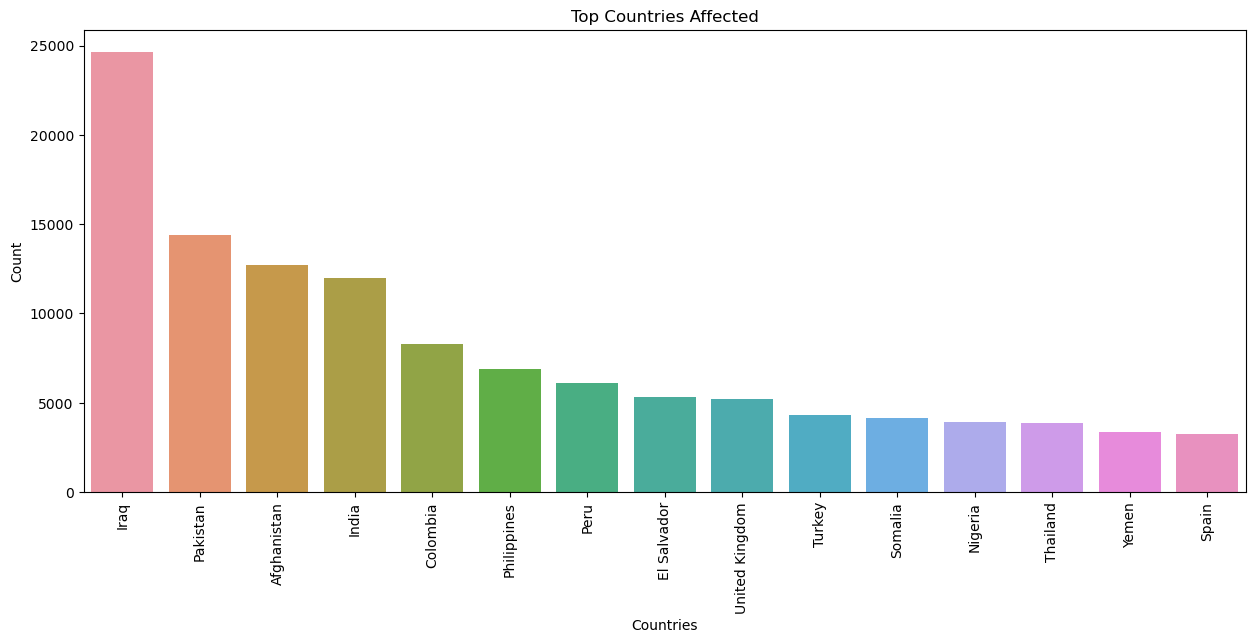

In [67]:
plt.subplots(figsize=(15,6))
sns.barplot(x=data['Country'].value_counts()[:15].index,y=data['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#  VISUALIZATION OF DATA

In [132]:
data.loc[:,'Weapon_type'].value_counts(dropna = False).sort_index()

Weapon_type
Biological                                                                        35
Chemical                                                                         321
Explosives                                                                     92426
Fake Weapons                                                                      33
Firearms                                                                       58524
Incendiary                                                                     11135
Melee                                                                           3655
Other                                                                            114
Radiological                                                                      14
Sabotage Equipment                                                               141
Unknown                                                                        15157
Vehicle (not to include vehicle-borne explosives, i.e

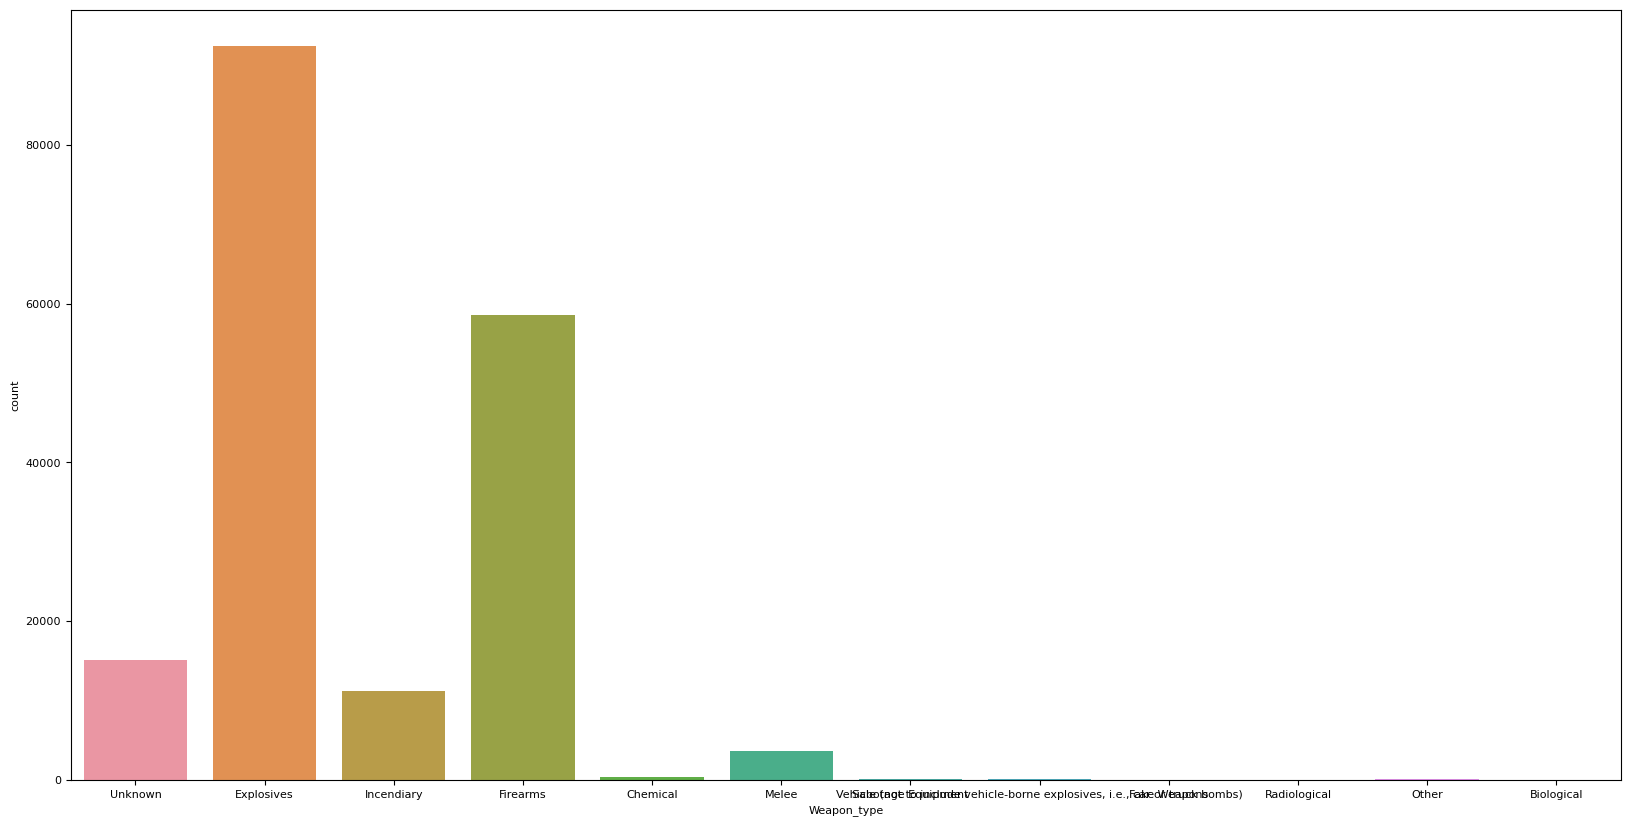

In [114]:
# Create a countplot for Displaying the count of the weapon types
plt.figure(figsize=(20,10));
sns.countplot(x=data.Weapon_type);

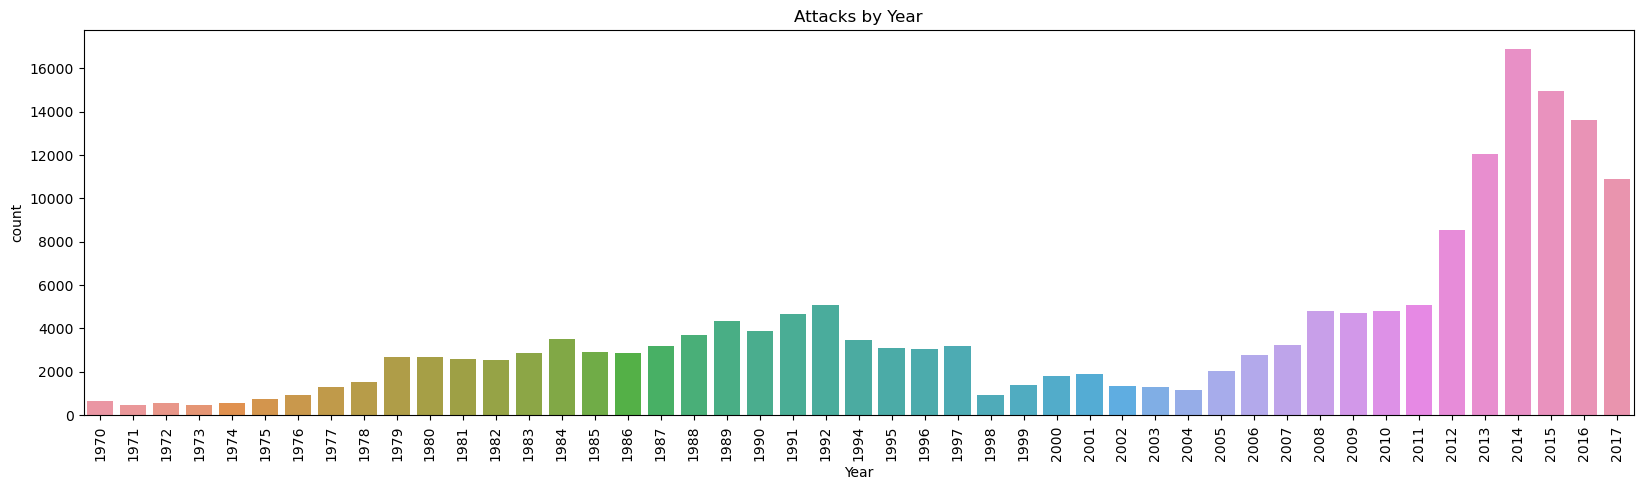

In [101]:
# Yearly attacks of Terrorism
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=data.Year);

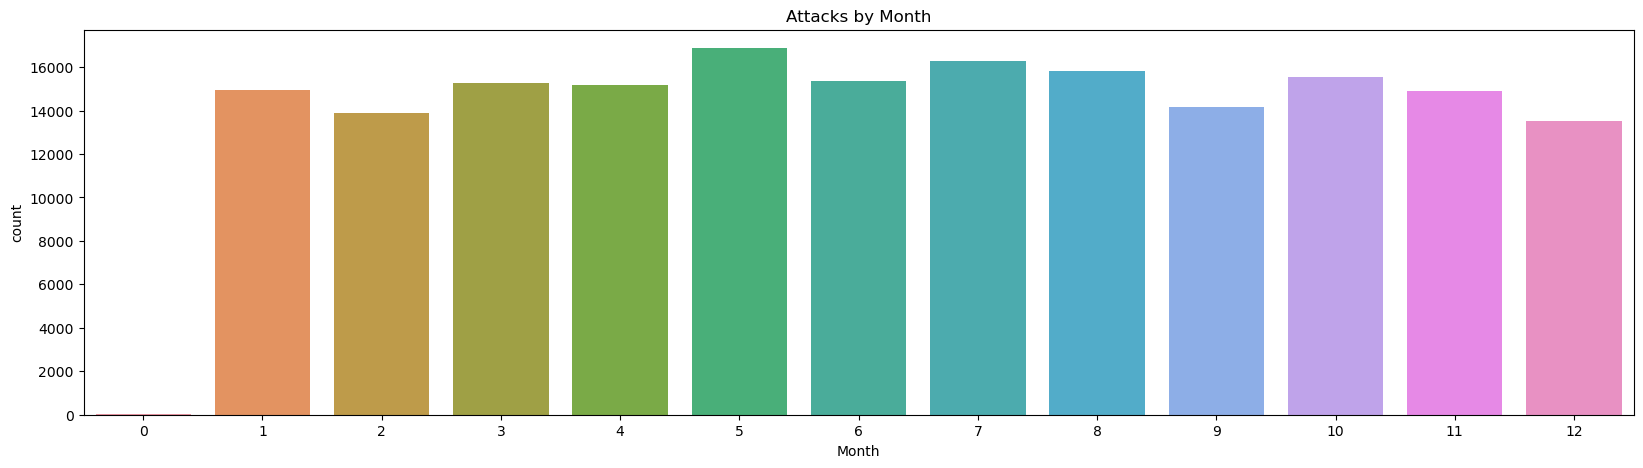

In [102]:
# Monthly attack of Terrorism
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=data.Month);

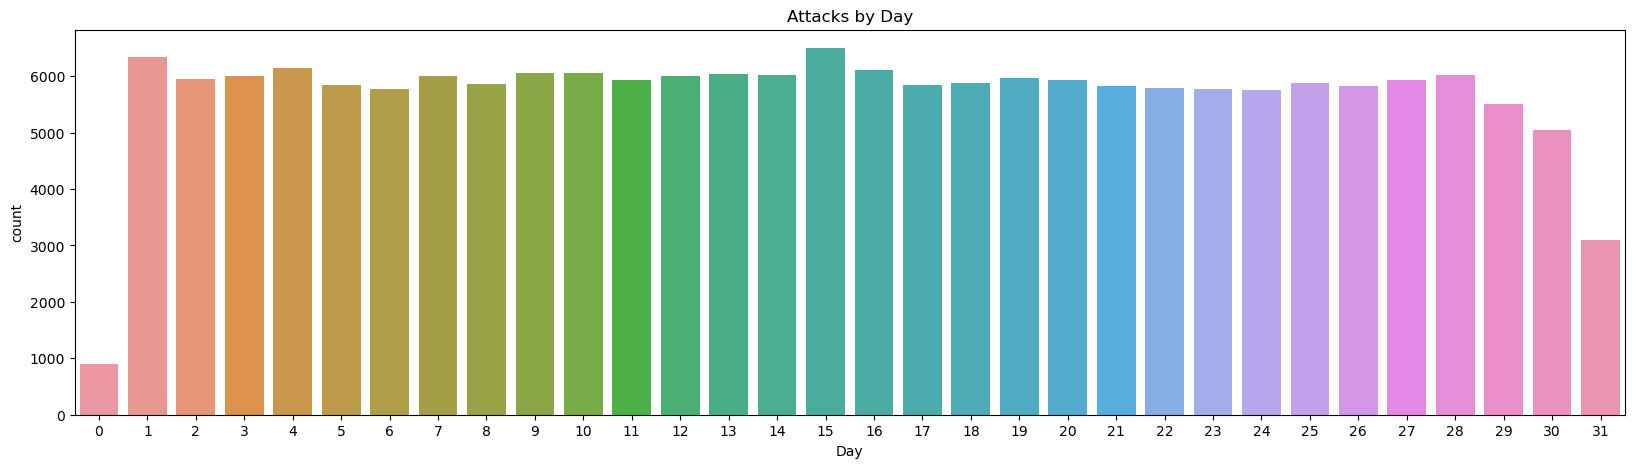

In [104]:
# Day basis attack in Terrorism
plt.figure(figsize=(20,5));
plt.title('Attacks by Day')
sns.countplot(x=data.Day);

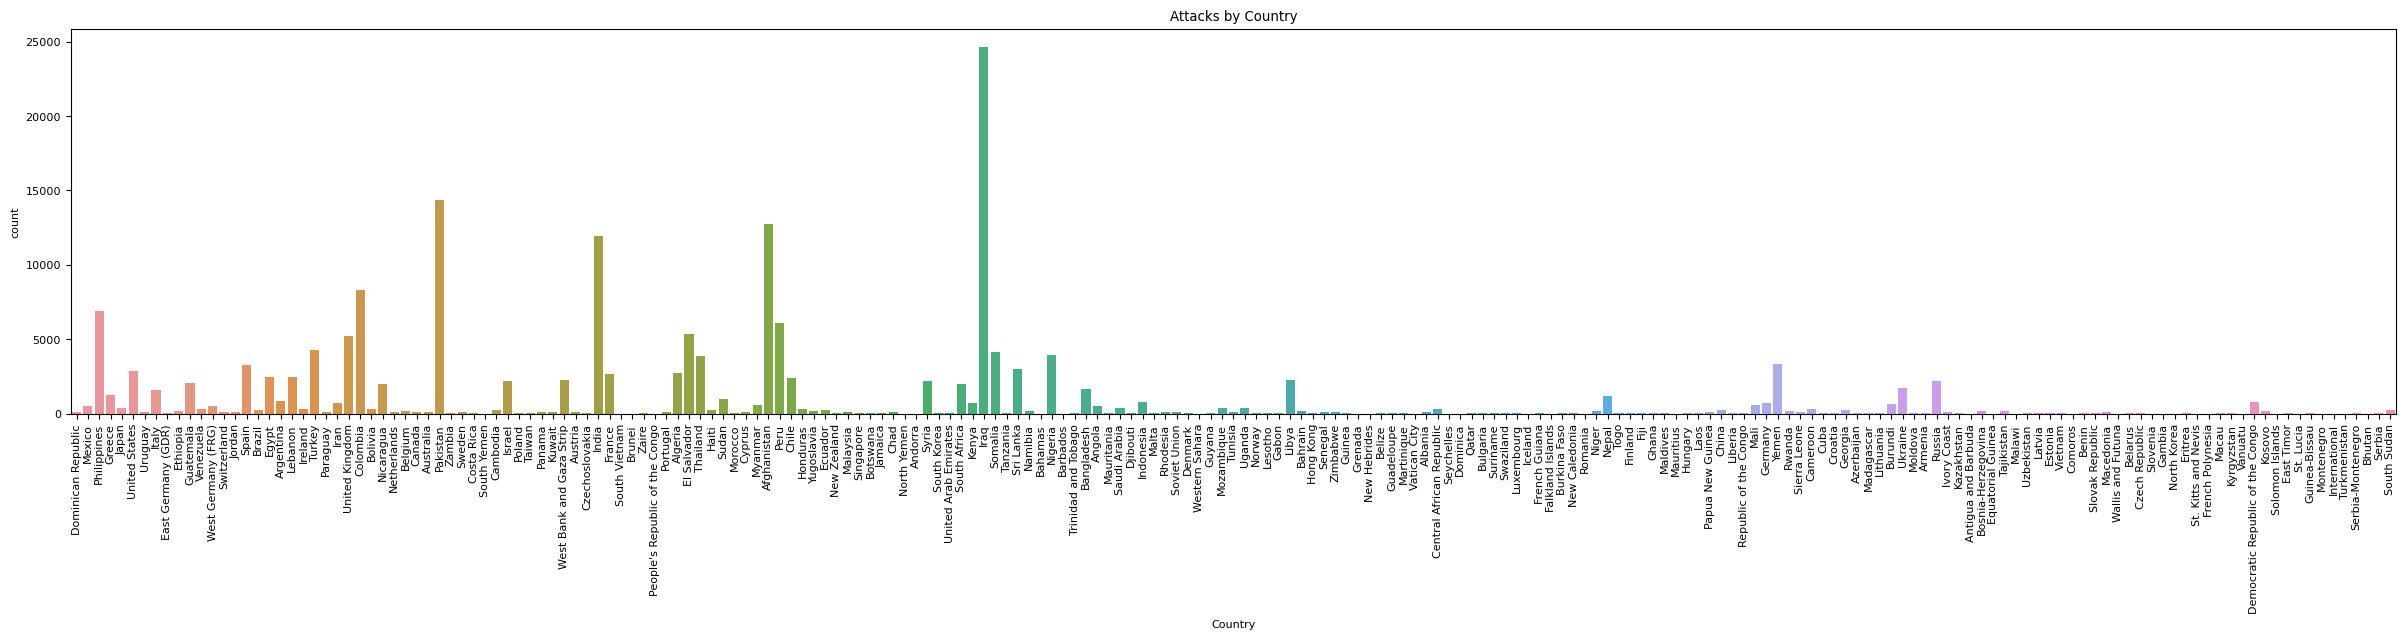

In [106]:
# Attacks by each of the country
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':8});
plt.xticks(rotation = 90)
plt.title('Attacks by Country')
sns.countplot(x=data.Country);

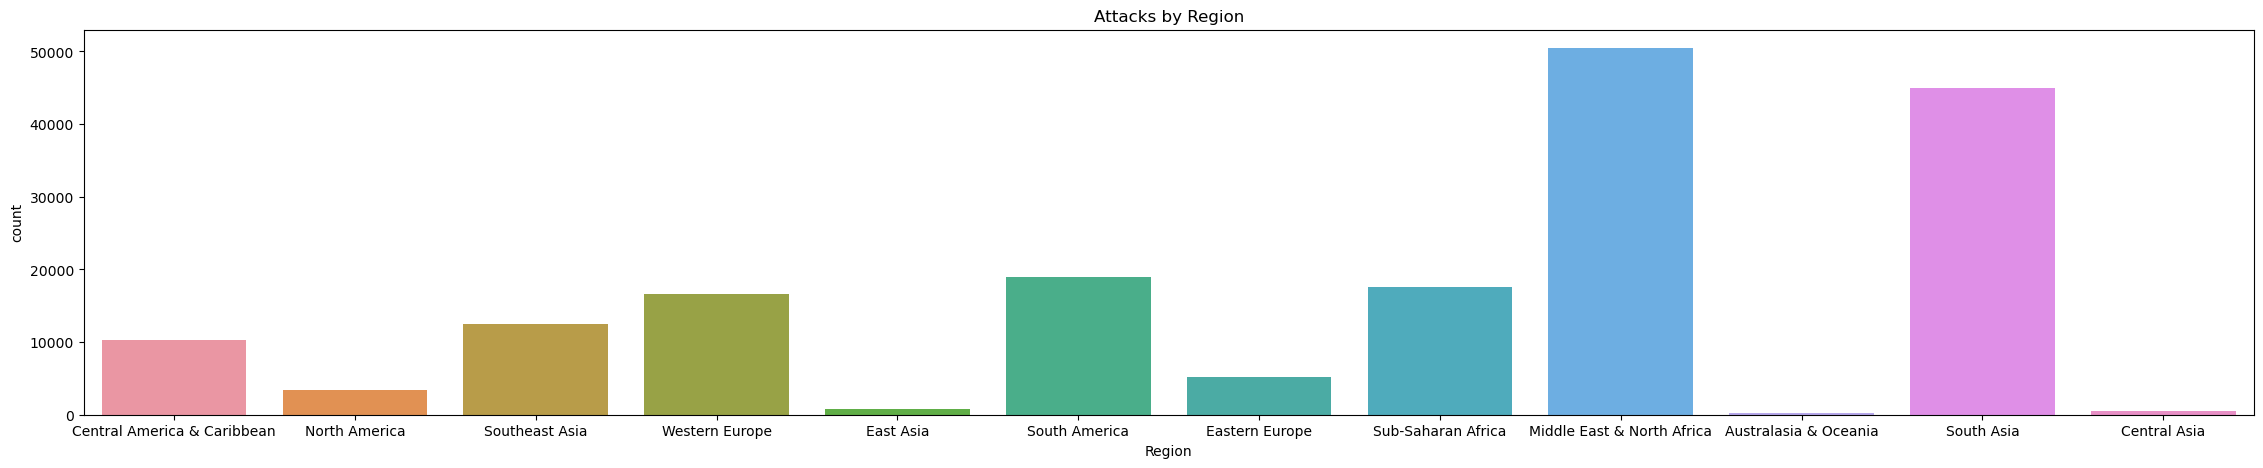

In [115]:
# Attacks by the region of each country
plt.figure(figsize=(28,5));
plt.rcParams.update({'font.size':10});
plt.xticks(rotation = 0)
plt.title('Attacks by Region')
sns.countplot(x=data.Region);

# TERRORISM ACTIVITIES


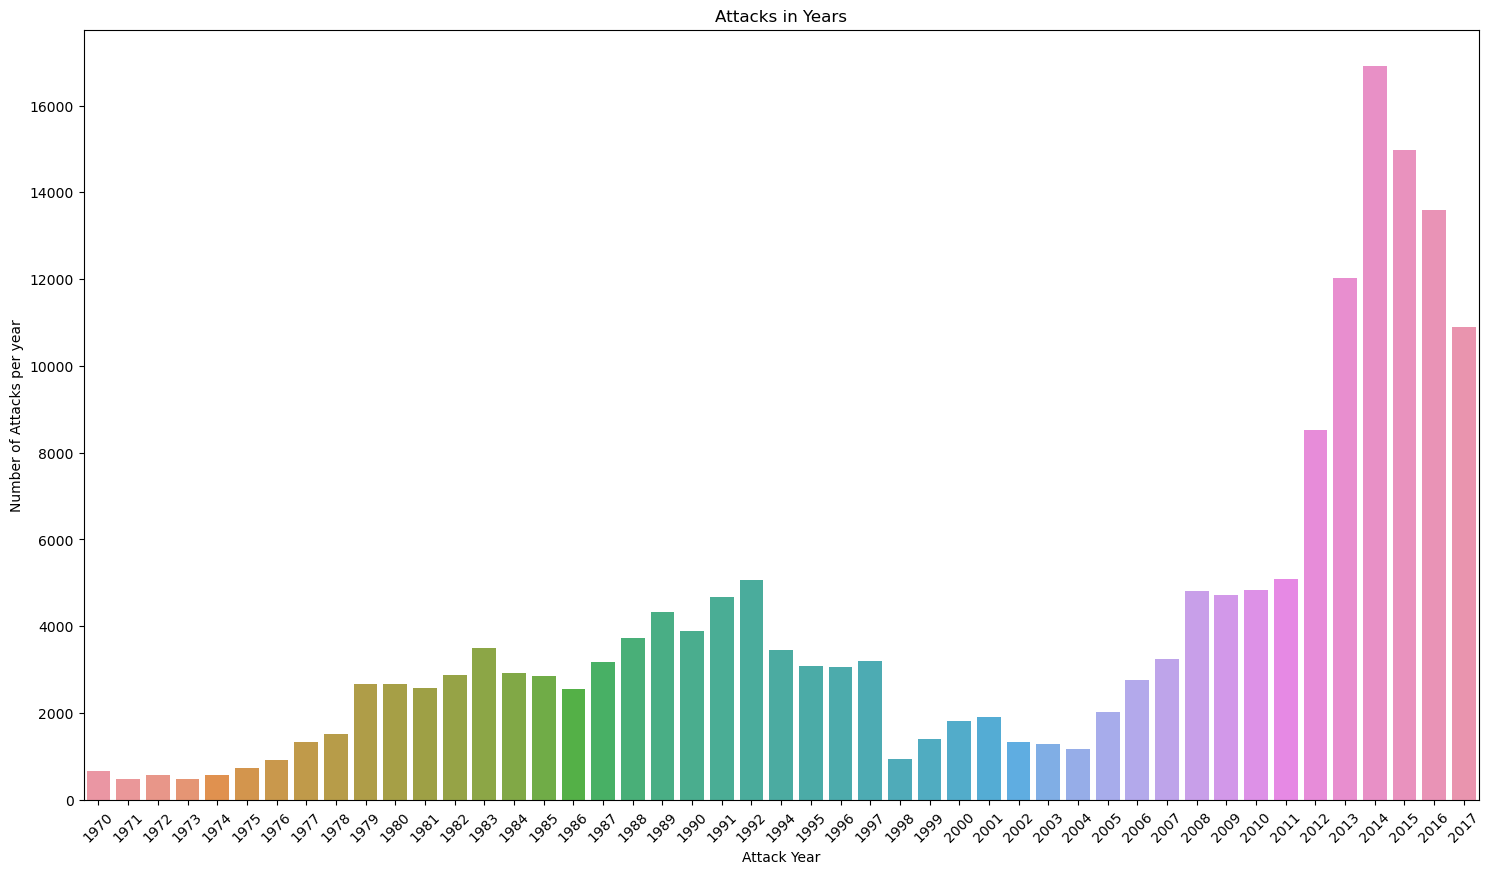

In [118]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,)
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks per year')
plt.title('Attacks in Years')
plt.show()

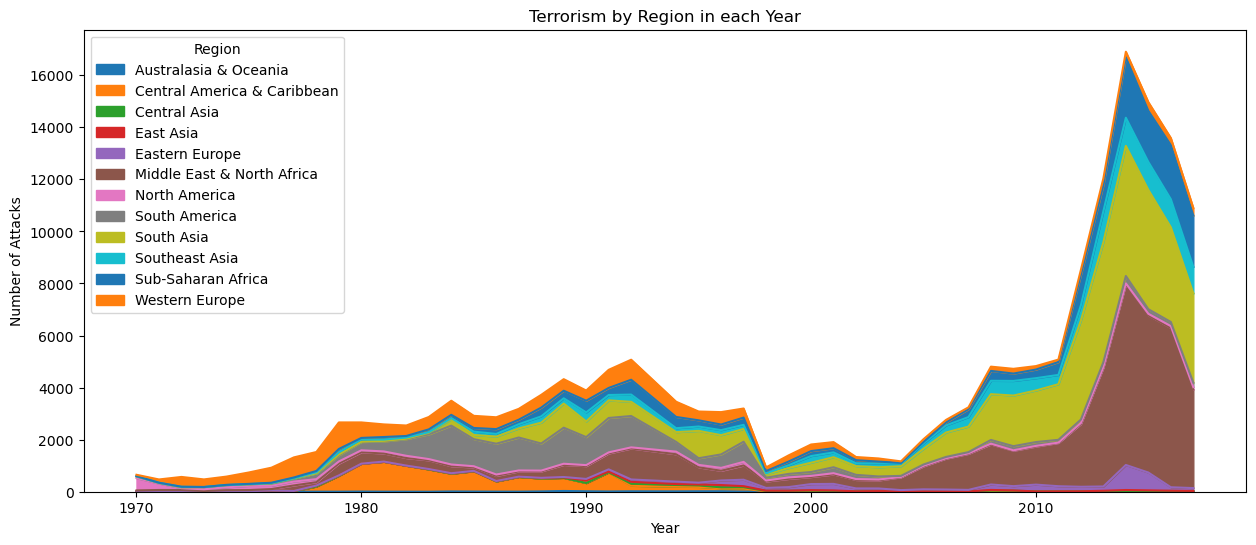

In [120]:
# Using Crosstab
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorism by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Common data analysis

In [121]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1])
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


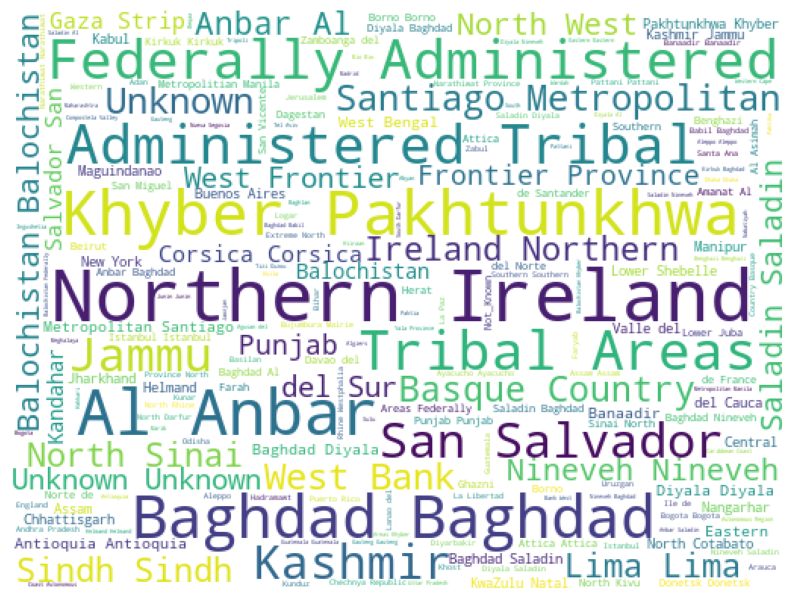

In [130]:
# Display the same in wordcloud
from wordcloud import WordCloud
from scipy import signal
cities = data.state
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'White',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()